Just storing some extra code in here for now - come back later for updates! 

---
### Missing data

There's a significant amount of missing at random values that we should consider dropping or replacing with imputed values. Instead of being filled with nulls, these missing values are automatically filled with a designated fill value. The fill value is unique for each variable and can be found in the variable descriptions in the OPeNDAP servers. 

METBK variables: sea_surface_temperature, met_windavg_mag_corr_east, met_windavg_mag_corr_north


| METBK variable             | Fill value |
|----------------------------|------------|
| sea_surface_temperature    | -9999999.0 |
| met_windavg_mag_corr_east  | -9999999.0 |
| met_windavg_mag_corr_north | -9999999.0 |

platform variables: seawater_pressure, density, practical_salinity, seawater_temperature, dissolved_oxygen]

| 200m platform variable | Fill value |
|------------------------|------------|
| seawater_pressure      | -9999999.0 |
| density                | -9999999.0 |
| practical_salinity     | -9999999.0 |
| seawater_temperature   | -9999999.0 |
| dissolved_oxygen       | -9999999.0 |

How nice that they all have the same fill value! Let's check how many observations were filled with these values in the data we pulled.

First, I know there are some null values in the METBK dataset, let's see how many there are. 

In [8]:
METBK_data.isna().sum()/len(METBK_data)

time                          0.000000
sea_surface_temperature       0.000000
met_windavg_mag_corr_east     0.037064
met_windavg_mag_corr_north    0.037064
dtype: float64

Hmm, less than 5% of the data. It might be okay to drop these. We can use a handy module called missingno to see where the nulls are located. 

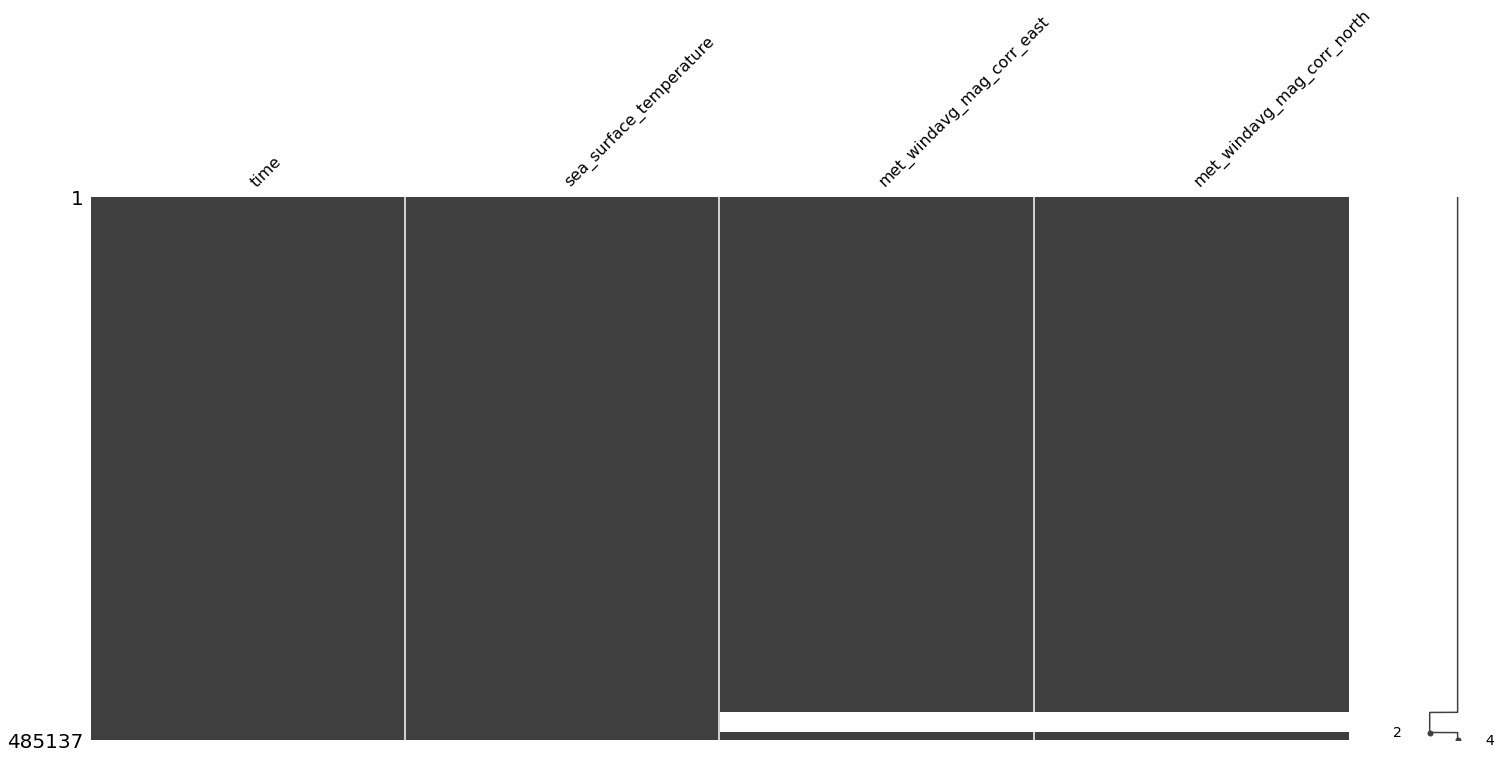

In [10]:
msno.matrix(METBK_data);

Ahh, these must be the odd values that were in the very first plot I made in the 02_data_analysis_2017 notebook! These values don't overlap with the time period covered by the 200 meter platform so we don't actually need to worry about them since we'll be dropping those observations anyway! Let's do that now, and then look for those fill values. 

First, find the last observation in 2017 collected by the 200 meter platform.

In [ ]:
def remove_zeros(df, variables):
    cnames = []
    for v in variables:
        if v not in ['lat', 'lon']:
            cname = v + '_ind'
            cnames.append(cname)
            df[cname] = df[v] > 0.00
    for cn in cnames:
        df = df.loc[df[cn] == True]
    df = df.drop(columns=cnames)
    return df

---
### Identifying gaps in data

I looked into the starts and ends of several gaps in the 2018 shallow profiler data. I don't need the code immediately, but want to keep these because I'll likely incorporate it for modeling eventually. 

There are several times where the sensor appears to be non-functional. I don' want to interpolate over these regions, because the interpolation won't be at all informed of the true structure of the water column. I decided to create a dictionary containing the start and end dates of time periods I want to drop, as the key:value pairs. Then I can drop them all at once, see how much of the data I've lost, concatenate the dataframe to prevent gaps in the water column being passed to the interpolation and gridding function.

To choose the time periods to drop, I need to investigate each period one by one...

In [8]:
dates_to_drop = {}

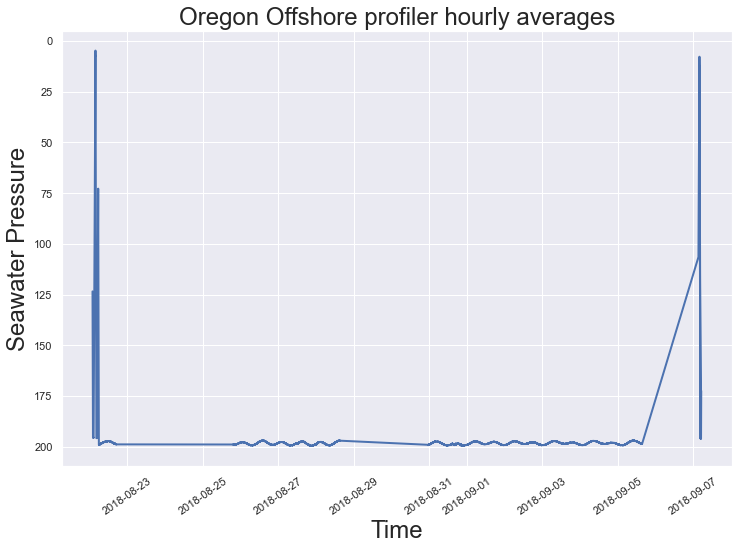

In [9]:
mask = (profiler_data['time'][:] > '2018-08-22 02:00:00') & (profiler_data['time'] <= '2018-09-07 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

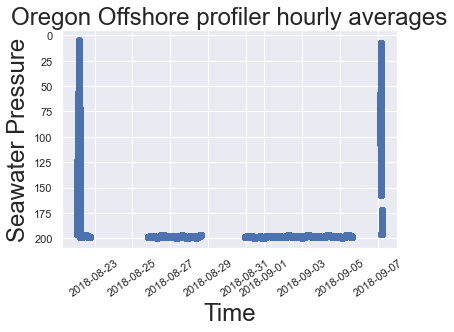

In [10]:
mask = (profiler_data['time'][:] > '2018-08-22 02:00:00') & (profiler_data['time'] <= '2018-09-07 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(df_temp['time'], df_temp['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [11]:
df = profiler_data

In [12]:
# mask = (df['time'] > '2018-08-22 02:00:00') & (df['time'] <= '2018-09-07 05:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True)

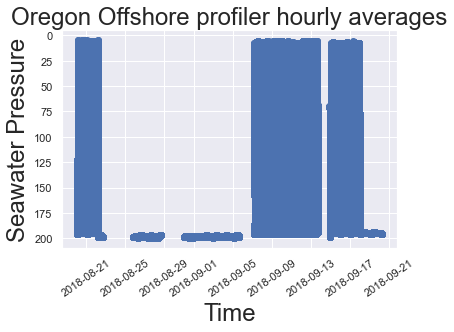

In [13]:
mask = (profiler_data['time'][:] > '2018-08-20 02:00:00') & (profiler_data['time'] <= '2018-09-20 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

Now there's no data here! We can repeat this a couple more times. 

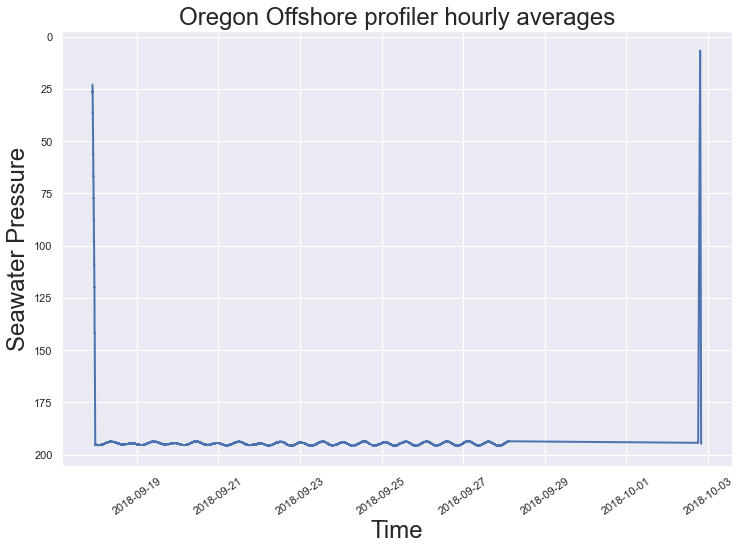

In [14]:
mask = (profiler_data['time'][:] > '2018-09-17 22:00:00') & (profiler_data['time'] <= '2018-10-02 20:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [15]:
# mask = (df['time'] > '2018-09-17 22:00:00') & (df['time'] <= '2018-10-02 20:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True)

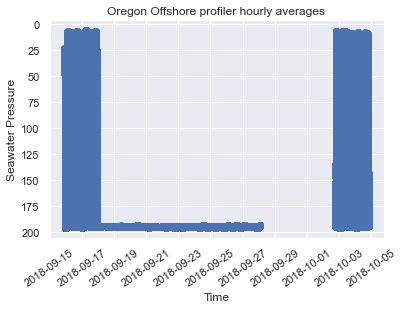

In [16]:
mask = (df['time'] > '2018-09-15 22:00:00') & (profiler_data['time'] <= '2018-10-04 20:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Seawater Pressure')
ax.set_title('Oregon Offshore profiler hourly averages')
ax.invert_yaxis()

plt.xticks(rotation=35);

Let's do just one more for now.

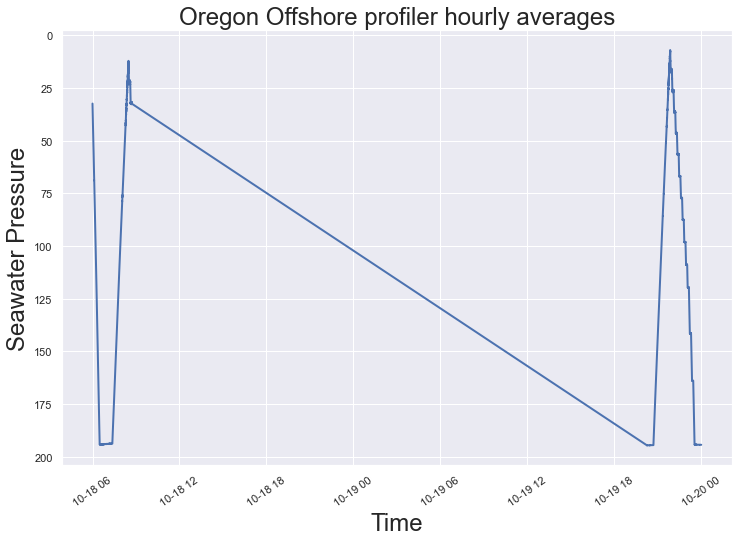

In [18]:
mask = (profiler_data['time'][:] > '2018-10-18 06:00:00') & (profiler_data['time'] <= '2018-10-20 00:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [19]:
# mask = (df['time'] > '2018-10-18 06:00:00') & (df['time'] <= '2018-10-20 00:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True, inplace=True)

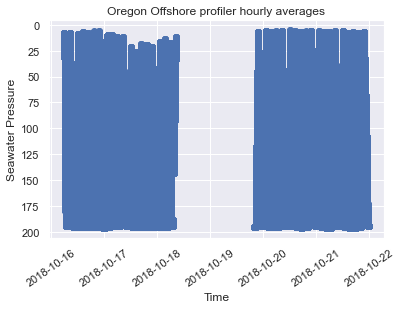

In [20]:
mask = (df['time'] > '2018-10-16 06:00:00') & (profiler_data['time'] <= '2018-10-22 00:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Seawater Pressure')
ax.set_title('Oregon Offshore profiler hourly averages')
ax.invert_yaxis()

plt.xticks(rotation=35);

In [21]:
df

,time,seawater_pressure,density,practical_salinity,seawater_temperature,corrected_dissolved_oxygen
0,2018-07-17 15:38:50.061576192,81.279138,1026.516091,33.675824,8.613400,92.728326
1,2018-07-17 15:38:51.061581824,81.182077,1026.515845,33.675754,8.611768,92.708655
2,2018-07-17 15:38:52.061271552,81.084999,1026.515921,33.676071,8.610009,92.688996
3,2018-07-17 15:38:53.061588992,80.987921,1026.517571,33.678387,8.608188,92.679191
4,2018-07-17 15:38:54.061177344,80.889759,1026.518862,33.680522,8.607749,92.633305
...,...,...,...,...,...,...
13164698,2018-12-31 11:59:55.458120192,61.875097,1025.117886,32.660133,11.666675,258.166072
13164699,2018-12-31 11:59:56.458231296,61.828144,1025.117640,32.660090,11.666675,258.112745
13164700,2018-12-31 11:59:57.458030592,61.794006,1025.117535,32.660169,11.666744,258.100726
13164701,2018-12-31 11:59:58.457932288,61.756694,1025.117198,32.660002,11.666952,258.181654


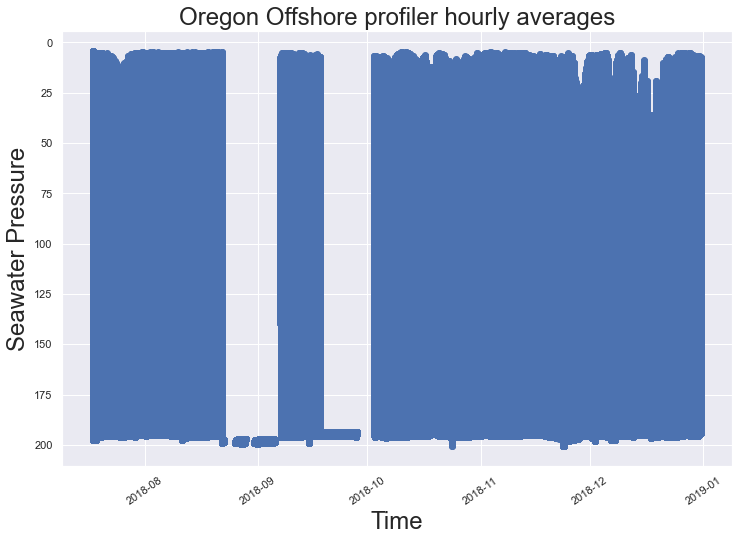

In [22]:
# Plot hourly-averaged METBK data
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.scatter(df['time'], df['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [38]:
# set masks to recreate gaps in our data
mask1 = (df_resampled['time'] > '2018-08-22 02:00:00') & (df_resampled['time'] <= '2018-09-07 05:00:00')
mask2 = (df_resampled['time'] > '2018-09-15 22:00:00') & (df_resampled['time'] <= '2018-10-04 20:00:00')
mask3 = (df_resampled['time'] > '2018-10-16 06:00:00') & (df_resampled['time'] <= '2018-10-22 00:00:00')

In [ ]:
# mask out the gaps when plotting
zi[mask1] = np.nan
zi[mask2] = np.nan
zi[mask3] = np.nan